In [ ]:
!pip install -q diffusers torch torchvision transformers accelerate
!pip install -q pillow matplotlib
!pip install -q sentencepiece protobuf

from huggingface_hub import login

token = os.getenv("HF_TOKEN")
login(token = token)


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from diffusers import FluxImg2ImgPipeline
from diffusers.utils import load_image

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def display_images(images, titles=None, figsize=(12, 6)):
    """Display images side by side"""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if len(images) == 1:
        axes = [axes]
    
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

Using device: cuda


In [2]:

print("Loading FLUX Img2Img Pipeline...")

pipe = FluxImg2ImgPipeline.from_pretrained(
    # "black-forest-labs/FLUX.1-schnell", 
    "black-forest-labs/FLUX.1-dev", 
    torch_dtype=torch.bfloat16
).to(device)

print("✓ FLUX Img2Img loaded!")


Loading FLUX Img2Img Pipeline...


model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


✓ FLUX Img2Img loaded!


In [3]:
def edit_image(image_path, prompt, strength=0.6, steps=4, seed=42):
    """
    Edit an image with a text prompt using FLUX
    
    Args:
        image_path: Path to image or PIL Image
        prompt: Text description of changes
        strength: How much to change (0.1-1.0)
        steps: Number of steps (4 for schnell)
        seed: Random seed
    
    Returns:
        original_image, edited_image
    """
    
    # Load image
    if isinstance(image_path, str):
        image = load_image(image_path)
    else:
        image = image_path
    
    # Resize for optimal performance
    image = image.resize((1024, 1024))
    
    print(f"Editing image with prompt: {prompt}")
    print(f"Strength: {strength}, Steps: {steps}")
    
    # Generate
    generator = torch.Generator(device=device).manual_seed(seed)
    
    result = pipe(
        prompt=prompt,
        image=image,
        num_inference_steps=steps,
        strength=strength,
        guidance_scale=0.0,  # 0.0 for schnell
        generator=generator
    ).images[0]
    
    return image, result


In [12]:
YOUR_IMAGE_PATH = "img1.jpg"  # Change this
# YOUR_PROMPT = "cyberpunk neon style of the landscape"        # Change this

YOUR_PROMPT = "Oil painting style of the landscape"

Editing image with prompt: Oil painting style of the landscape
Strength: 0.75, Steps: 100


  0%|          | 0/75 [00:00<?, ?it/s]

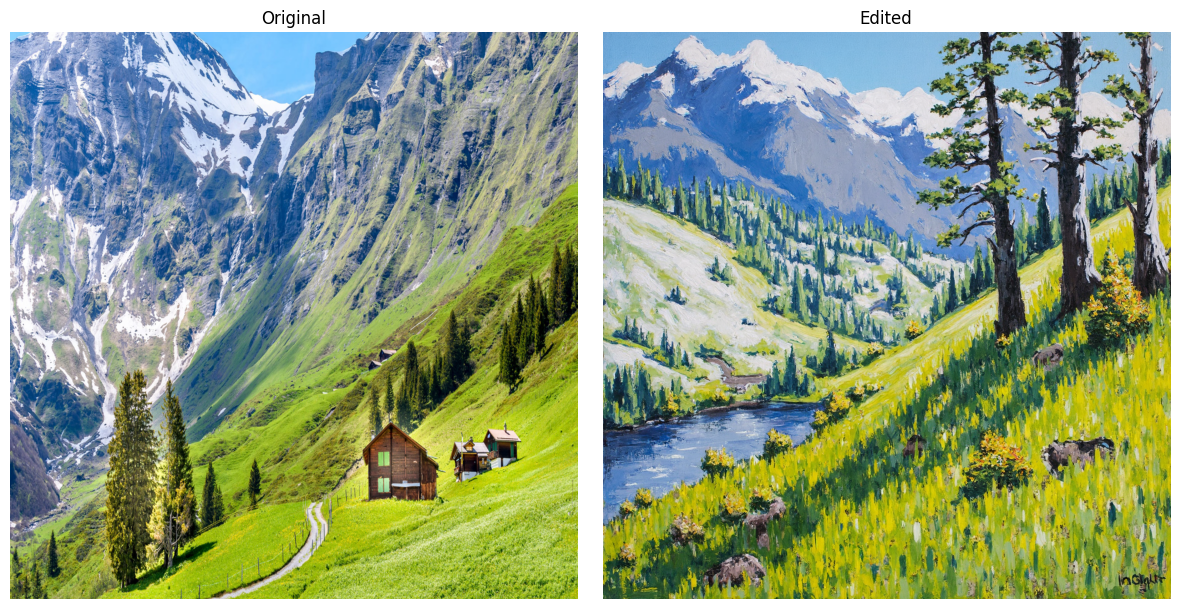

✓ Saved edited_image.png


In [9]:
original, edited = edit_image(YOUR_IMAGE_PATH, YOUR_PROMPT,steps=100, strength = 0.75)
display_images([original, edited], ["Original", "Edited"])
edited.save("edited_image.png")
print("✓ Saved edited_image.png")

Editing image with prompt: Oil painting style of the landscape
Strength: 0.5, Steps: 100


  0%|          | 0/50 [00:00<?, ?it/s]

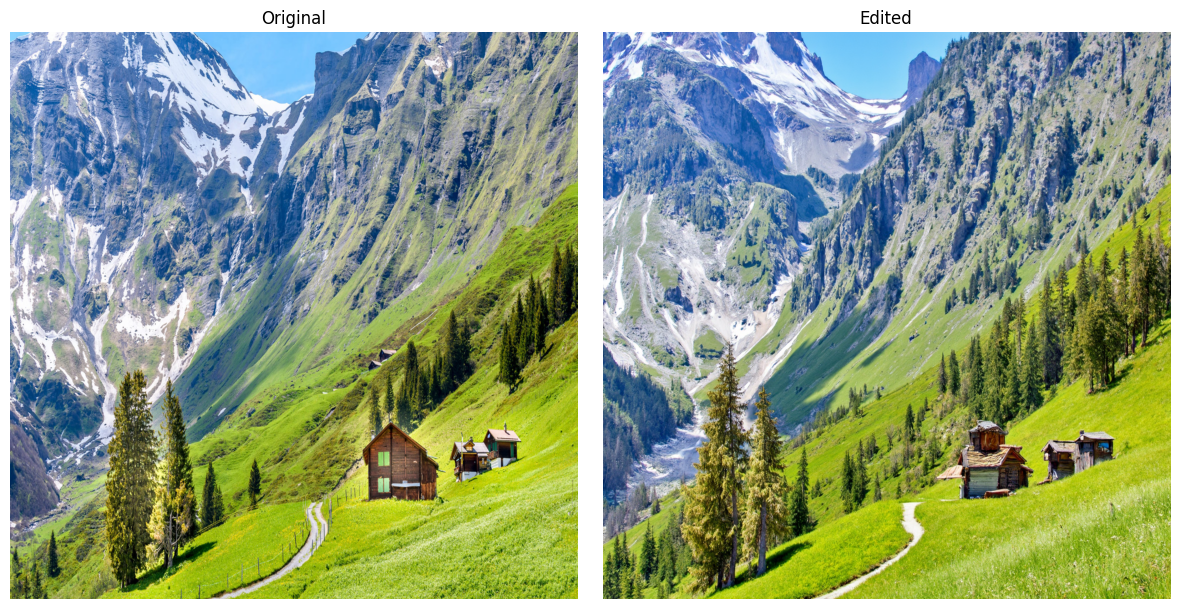

✓ Saved edited_image.png


In [13]:
original, edited = edit_image(YOUR_IMAGE_PATH, YOUR_PROMPT,steps=100, strength = 0.50)
display_images([original, edited], ["Original", "Edited"])
edited.save("edited_image.png")
print("✓ Saved edited_image.png")

Editing image with prompt: Sunset in between of the mountains
Strength: 0.75, Steps: 100


  0%|          | 0/75 [00:00<?, ?it/s]

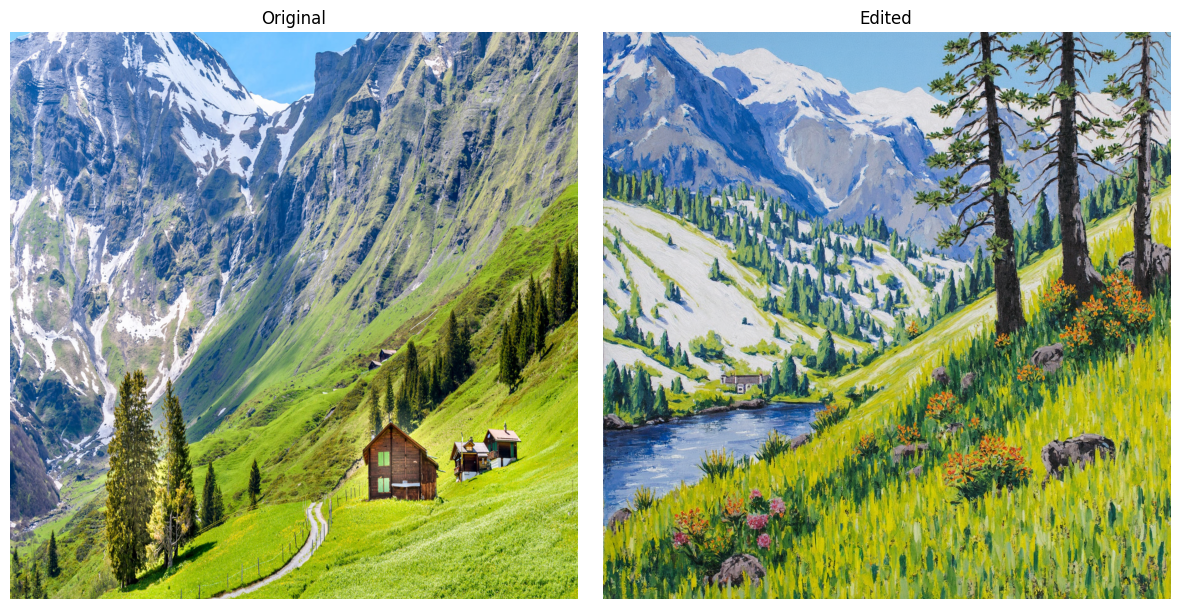

In [15]:
YOUR_IMAGE_PATH = "img1.jpg"  # Change this
# YOUR_PROMPT = "cyberpunk neon style of the landscape"        # Change this

YOUR_PROMPT = "Sunset in between of the mountains"
original, edited = edit_image(YOUR_IMAGE_PATH, YOUR_PROMPT,steps=100,  strength=0.75)
display_images([original, edited], ["Original", "Edited"])


Editing image with prompt: 
Strength: 0.5, Steps: 100


  0%|          | 0/50 [00:00<?, ?it/s]

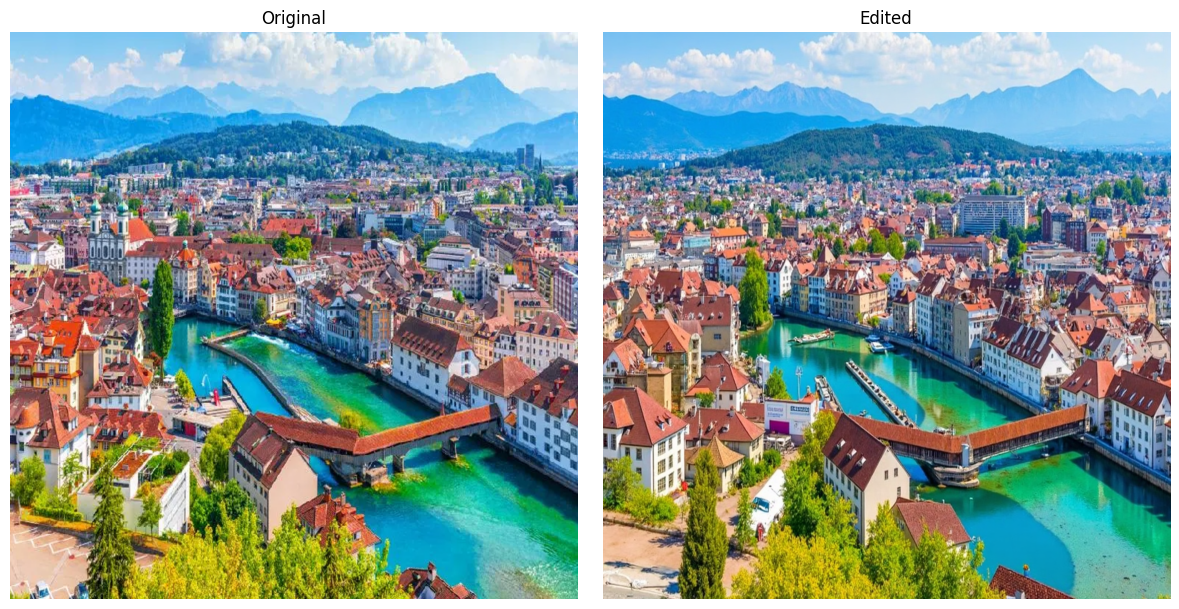

In [14]:
YOUR_IMAGE_PATH = "img2.jpg"  # Change this
YOUR_PROMPT = "godzilla in center of the lake"        # Change this

YOUR_PROMPT = ""
original, edited = edit_image(YOUR_IMAGE_PATH, YOUR_PROMPT,steps=100,  strength=0.5)
display_images([original, edited], ["Original", "Edited"])


In [ ]:

# ============================================================================
# CELL 7: Different Strengths
# ============================================================================

def test_strengths(image, prompt):
    """Test different editing strengths"""
    strengths = [0.3, 0.5, 0.7, 0.9]
    results = [image]  # Original first
    titles = ["Original"]
    
    for strength in strengths:
        _, edited = edit_image(image, prompt, strength=strength, seed=42)
        results.append(edited)
        titles.append(f"Strength {strength}")
    
    display_images(results, titles, figsize=(20, 4))

# Test different strengths
test_strengths(test_image, "watercolor painting style")

# ============================================================================
# CELL 8: Multiple Style Edits
# ============================================================================

def style_variations(image, styles):
    """Create multiple style variations"""
    results = [image]
    titles = ["Original"]
    
    for i, style in enumerate(styles):
        _, edited = edit_image(image, style, strength=0.8, seed=i*10)
        results.append(edited)
        titles.append(style)
    
    display_images(results, titles, figsize=(20, 4))

# Test different styles
styles = [
    "oil painting",
    "cyberpunk neon", 
    "watercolor art",
    "pencil sketch"
]

style_variations(test_image, styles)

# ============================================================================
# CELL 9: Usage Guide
# ============================================================================

print("""
=== FLUX IMAGE EDITING GUIDE ===

MAIN FUNCTION:
original, edited = edit_image(image_path, prompt)

PARAMETERS:
• strength: 0.1 (subtle) to 1.0 (dramatic change)
• steps: 4 (for schnell model)
• seed: Any number for consistent results

EXAMPLES:
edit_image("photo.jpg", "oil painting style")
edit_image("photo.jpg", "cyberpunk neon lights")
edit_image("photo.jpg", "black and white vintage")

STRENGTH GUIDE:
• 0.1-0.3: Subtle changes, keep most details
• 0.4-0.6: Moderate changes
• 0.7-0.9: Strong changes
• 0.9-1.0: Dramatic transformation

THAT'S IT! Simple image editing with FLUX!
""")